In [89]:
import os
import shutil
import random
from PIL import Image
import numpy as np
from skimage import io, color, measure
from skimage.segmentation import watershed
from skimage.filters import sobel
from skimage import morphology
from skimage import io, color, filters, exposure, morphology, measure
import matplotlib.pyplot as plt

def my_mask(image_path):
    img = io.imread(image_path)
    
    mask_image = img.copy()
    if len(mask_image.shape) == 2:
        mask_image = np.stack((mask_image, mask_image, mask_image), axis=-1)
    mask_image = np.dstack((mask_image, np.full(mask_image.shape[:2], 255, dtype=np.uint8)))
    
    # Convert the image to grayscale if it's an RGB image
    if len(img.shape) == 3:
        img_gray = color.rgb2gray(img)
    else:
        img_gray = img
    
    # Equalize the histogram of the grayscale image
    #img_gray = exposure.equalize_hist(img_gray)
    
    # Apply Sobel filter to highlight edges
    edges = sobel(img_gray)
    
    # Apply Watershed algorithm for segmentation
    # TODO: is counting edges by percentile really the best metric???
    markers = morphology.label(edges > np.percentile(edges, 80)) 
    segmentation = watershed(edges, markers)
    
    # Label regions
    labeled_regions = measure.label(segmentation)
    
    # Get properties of the regions
    props = measure.regionprops(labeled_regions)
    
    # Get the largest region assuming it's the rock/mineral
    largest_region = max(props, key=lambda x: x.area)
    
    # Create a mask for the largest region
    mask = labeled_regions == largest_region.label
    
    # chk_img = img.copy()
    # chk_img[mask,:] = [255,0,0]
    
    mask_image[mask,:3] = img[mask,:3]
    mask_image[mask, 3] = 0

    plt.imshow(mask_image)

In [6]:
rootdir = "deeplearning_images/Galena"

fnames = os.listdir(rootdir)
img_fname = []
for fname in fnames:
    if fname.split('.')[-1] == 'jpg':
        img_fname.append(f"{rootdir}/{fname}")
    else:
        pass

print(img_fname)
print(len(img_fname))

['deeplearning_images/Galena/02534110014961094496214.jpg', 'deeplearning_images/Galena/01193780015048016909492.jpg', 'deeplearning_images/Galena/08820860014960851568723.jpg', 'deeplearning_images/Galena/01124090014961094482052.jpg', 'deeplearning_images/Galena/01637370014951464241073.jpg', 'deeplearning_images/Galena/00034680014953991968170.jpg', 'deeplearning_images/Galena/04548750014954154765482.jpg', 'deeplearning_images/Galena/07293530014960834337729.jpg', 'deeplearning_images/Galena/06150430017055881865498.jpg', 'deeplearning_images/Galena/07410280015917053336881.jpg', 'deeplearning_images/Galena/Galena_-_Huallanca,_Bologesi,_Ancash,_Peru.jpg', 'deeplearning_images/Galena/06945410015935380082721.jpg', 'deeplearning_images/Galena/02703910014961094484473.jpg', 'deeplearning_images/Galena/05355450015388522823901.jpg']
14


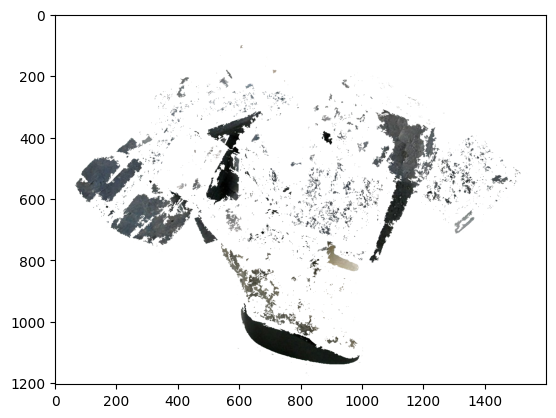

In [100]:
my_mask(img_fname[1])